In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

import pandas as pd
import numpy
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")


In [6]:
# connect to database, we will only connect once due to the amount of queries we will be doing
db = engine.connect()

In [7]:
# two tables, measurements & station
inspector = inspect(engine)

tables = inspector.get_table_names()

tables

['measurement', 'station']

In [8]:
# get table column details 
columns = inspector.get_columns("measurement")
columns

[{'name': 'id',
  'type': INTEGER(),
  'nullable': False,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 1},
 {'name': 'station',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'date',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'prcp',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'tobs',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0}]

In [9]:
# get table column details, it would seem that ID and station ar overlapping, 
# we will connect the two tables via station 
columns = inspector.get_columns("station")
columns

[{'name': 'id',
  'type': INTEGER(),
  'nullable': False,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 1},
 {'name': 'station',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'name',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'latitude',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'longitude',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'elevation',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0}]

In [10]:
# Calculate the date 1 year ago from the last data point in the database
query = "SELECT max(date) from measurement"
engine.execute(query).fetchall()

[('2017-08-23',)]

In [11]:

query = """
            SELECT
                *
            FROM
                measurement
            WHERE
                date >= '2016-01-01'
                and prcp is not null
        """

# query = """
#             SELECT
#                 date,
#                 avg(prcp) as prcp
#             FROM
#                 measurement
#             WHERE
#                 date >= '2016-08-23'
#                 and prcp is not null
#             group by
#                 date
#             order by
#                 date asc
#         """

# Query All Records in the the Database
df = pd.read_sql(query, con=db)

# Preview the Data
df

,id,station,date,prcp,tobs
0,2129,USC00519397,2016-01-01,0.00,62.0
1,2130,USC00519397,2016-01-02,0.00,71.0
2,2131,USC00519397,2016-01-03,0.00,63.0
3,2132,USC00519397,2016-01-04,0.00,62.0
4,2133,USC00519397,2016-01-05,0.00,68.0
...,...,...,...,...,...
3331,19544,USC00516128,2017-08-17,0.13,72.0
3332,19546,USC00516128,2017-08-19,0.09,71.0
3333,19548,USC00516128,2017-08-21,0.56,76.0
3334,19549,USC00516128,2017-08-22,0.50,76.0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3336 entries, 0 to 3335
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3336 non-null   int64  
 1   station  3336 non-null   object 
 2   date     3336 non-null   object 
 3   prcp     3336 non-null   float64
 4   tobs     3336 non-null   float64
dtypes: float64(2), int64(1), object(2)
memory usage: 130.4+ KB


In [13]:
df.date.value_counts()

2017-02-24    7
2016-10-25    7
2016-09-23    7
2016-08-17    7
2016-08-18    7
             ..
2017-08-19    3
2017-08-01    3
2017-08-09    3
2017-08-20    2
2017-08-05    2
Name: date, Length: 601, dtype: int64

In [14]:
# Perform a query to retrieve the data and precipitation scores

# updating the query 
# query = """
#             SELECT
#                 date,
#                 prcp
#             FROM
#                 measurement
#             WHERE
#                 date >= '2016-01-01' and date <= '2017-01-01'
#                 and prcp is not null
#         """

query = """
            SELECT
                date,
                avg(prcp) as prcp
            FROM
                measurement
            WHERE
                date >= '2016-08-22' and date <= '2017-08-23'
                and prcp is not null
            group by
                date
            order by
                date asc
        """

# Query All Records in the the Database
df = pd.read_sql(query, con=db)

# Preview the Data
df.head(10)

,date,prcp
0,2016-08-22,1.052000
1,2016-08-23,0.451667
2,2016-08-24,1.555000
3,2016-08-25,0.077143
4,2016-08-26,0.016667
5,2016-08-27,0.064000
6,2016-08-28,0.516667
7,2016-08-29,0.243333
8,2016-08-30,0.011667
9,2016-08-31,0.636000


In [15]:
df.date.value_counts()

2017-03-12    1
2017-02-11    1
2017-03-09    1
2016-12-23    1
2017-02-22    1
             ..
2017-06-24    1
2017-01-01    1
2016-10-18    1
2016-09-11    1
2017-03-02    1
Name: date, Length: 367, dtype: int64

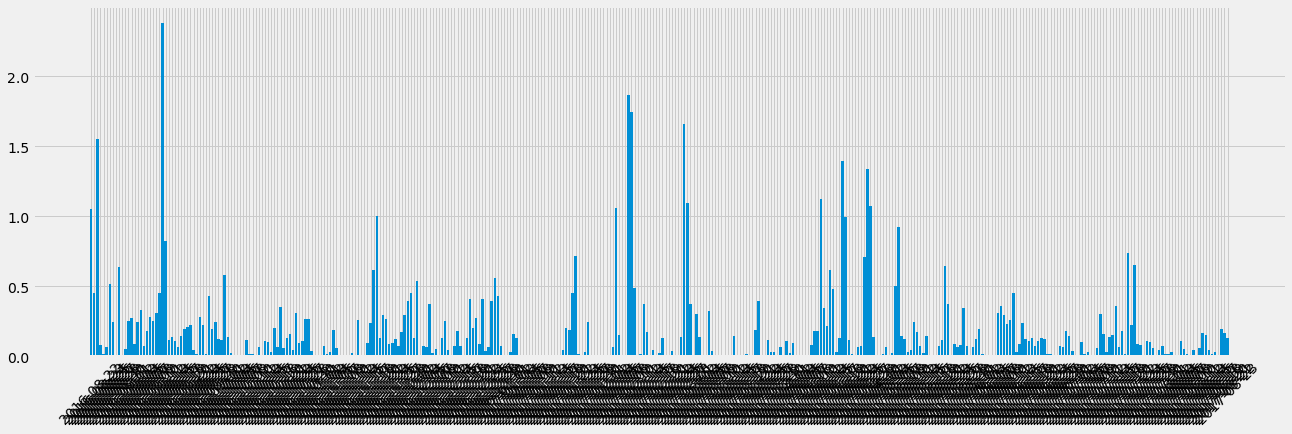

In [16]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
plt.figure(figsize=(20,6))
plt.bar(df.date, df.prcp)
plt.xticks(rotation=45)
plt.show()

In [17]:
df.describe()

,prcp
count,367.000000
mean,0.173158
std,0.298841
min,0.000000
25%,0.008571
50%,0.070000
75%,0.192500
max,2.380000


In [18]:
# df.groupby("date").describe()


In [19]:
# reflect an existing database into a new model

# reflect the tables

In [20]:
# We can view all of the classes that automap found


In [21]:
# Save references to each table


In [22]:
# Create our session (link) from Python to the DB


# Exploratory Climate Analysis

In [23]:



# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


In [24]:
# Use Pandas to calcualte the summary statistics for the precipitation data

df.describe


<bound method NDFrame.describe of            date      prcp
0    2016-08-22  1.052000
1    2016-08-23  0.451667
2    2016-08-24  1.555000
3    2016-08-25  0.077143
4    2016-08-26  0.016667
..          ...       ...
362  2017-08-19  0.030000
363  2017-08-20  0.005000
364  2017-08-21  0.193333
365  2017-08-22  0.166667
366  2017-08-23  0.132500

[367 rows x 2 columns]>

In [25]:
# Design a query to show how many stations are available in this dataset?
query = """
    Select
        * 
    From
        Station
    """
df_station = pd.read_sql(query, con=db)
df_station.head(10)

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6
5,6,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
6,7,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
7,8,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9
8,9,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4


In [26]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

query = """
    Select
        s.station, 
        count(*) as record_count
    From
        measurement m
        JOIN station s on m.station=s.station 
    Group by 
        s.station
    Order by 
        record_count desc
        """


df_station2 = pd.read_sql(query, con=db)
df_station2.head(10)

,station,record_count
0,USC00519281,2772
1,USC00519397,2724
2,USC00513117,2709
3,USC00519523,2669
4,USC00516128,2612
5,USC00514830,2202
6,USC00511918,1979
7,USC00517948,1372
8,USC00518838,511


In [27]:
# query = """
#     Select
#        *
#     From
#         measurement m
#         JOIN station s on m.station=s.station 
#     WHERE
#         m.date
#         """


# all_data = pd.read_sql(query, con=db)
# all_data.head(10)

In [47]:
query = """
    Select
        m.*,
        s.id as station_id,
        s.name, 
        s.latitude, 
        s.longitude, 
        s.elevation
    From
        measurement m
        JOIN station s on m.station=s.station 
    WHERE
        m.date >= '2016-08-23'
        """

all_data = pd.read_sql(query, con=db)
all_data

,id,station,date,prcp,tobs,station_id,name,latitude,longitude,elevation
0,2364,USC00519397,2016-08-23,0.00,81.0,1,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
1,2365,USC00519397,2016-08-24,0.08,79.0,1,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
2,2366,USC00519397,2016-08-25,0.08,80.0,1,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
3,2367,USC00519397,2016-08-26,0.00,79.0,1,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
4,2368,USC00519397,2016-08-27,0.00,77.0,1,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
...,...,...,...,...,...,...,...,...,...,...
2225,19546,USC00516128,2017-08-19,0.09,71.0,9,"MANOA LYON ARBO 785.2, HI US",21.3331,-157.8025,152.4
2226,19547,USC00516128,2017-08-20,NaN,78.0,9,"MANOA LYON ARBO 785.2, HI US",21.3331,-157.8025,152.4
2227,19548,USC00516128,2017-08-21,0.56,76.0,9,"MANOA LYON ARBO 785.2, HI US",21.3331,-157.8025,152.4
2228,19549,USC00516128,2017-08-22,0.50,76.0,9,"MANOA LYON ARBO 785.2, HI US",21.3331,-157.8025,152.4


In [29]:
all_data.loc[all_data.station == "USC00519281"].tobs.describe()

count    352.000000
mean      73.107955
std        4.733315
min       59.000000
25%       70.000000
50%       74.000000
75%       77.000000
max       83.000000
Name: tobs, dtype: float64

In [33]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?  - USC00519281


query = """
            SELECT
                max(m.station),
                min(m.tobs), 
                max(m.tobs), 
                avg(m.tobs), 
                count(m.tobs)
            From
                measurement m
            JOIN station s on m.station=s.station
            Where
                m.station = 'USC00519281'
        """
                
temps_data = pd.read_sql(query, con=db)
temps_data              

,max(m.station),min(m.tobs),max(m.tobs),avg(m.tobs),count(m.tobs)
0,USC00519281,54.0,85.0,71.663781,2772


In [34]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

query = """
            SELECT
                m.*,
                s.id as station_id,
                s.name,
                s.latitude,
                s.longitude,
                s.elevation
            FROM
                measurement m
            JOIN station s on m.station=s.station
            WHERE
                m.station = 'USC00519281'
                and date >= '2016-08-23'
        """

# Query All Records in the the Database
temp_data2 = pd.read_sql(query, con=db)

temp_data2.head(10)


,id,station,date,prcp,tobs,station_id,name,latitude,longitude,elevation
0,14608,USC00519281,2016-08-23,1.79,77.0,7,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
1,14609,USC00519281,2016-08-24,2.15,77.0,7,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
2,14610,USC00519281,2016-08-25,0.06,80.0,7,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
3,14611,USC00519281,2016-08-26,0.01,80.0,7,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
4,14612,USC00519281,2016-08-27,0.12,75.0,7,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
5,14613,USC00519281,2016-08-28,0.60,73.0,7,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
6,14614,USC00519281,2016-08-29,0.35,78.0,7,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
7,14615,USC00519281,2016-08-30,0.00,77.0,7,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
8,14616,USC00519281,2016-08-31,0.24,78.0,7,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
9,14617,USC00519281,2016-09-01,0.02,80.0,7,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9


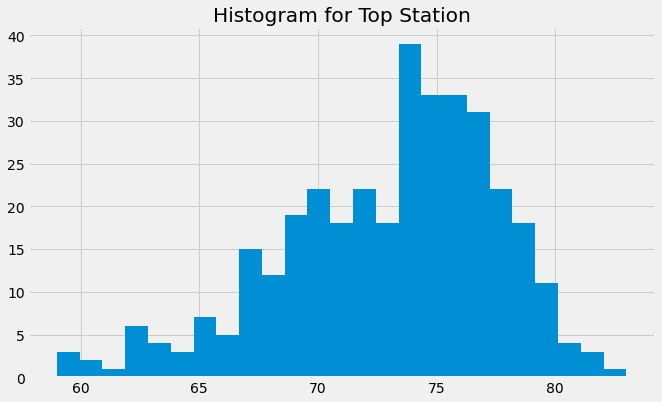

In [45]:
 plt.figure(figsize=(10,6))
plt.hist(temp_data2.tobs, bins=25)
plt.title("Histogram for Top Station")
plt.show()

## Bonus Challenge Assignment

In [38]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

NameError: name 'session' is not defined

In [43]:
start = '2017-01-01'
end = '2017-01-07'

query = f"""
            SELECT
                min(date) as start_date, 
                max(date) as end_date, 
                min(tobs) as min_temp, 
                avg(tobs) as avg_temp,
                max(tobs) as max_temp
            From
                measurement 
            Where
                date >= '{start}'
                and date<= '{end}'
                """
df = pd.read_sql(query, con=db)
df.head()

,start_date,end_date,min_temp,avg_temp,max_temp
0,2017-01-01,2017-01-07,62.0,68.365854,74.0


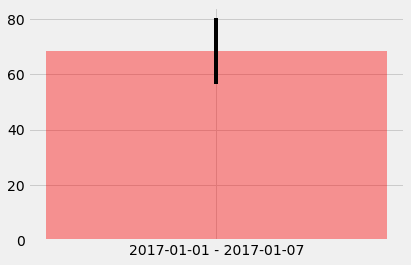

In [44]:
plt.bar(df.start_date + " - " + df.end_date, df.avg_temp, yerr= (df.max_temp - df.min_temp), color="red", alpha=0.4)
plt.show()

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
len(df)

In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
